**Библиотеки**

In [1]:
import numpy as np
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Работаем с данными**

In [2]:
df = pd.read_csv('cs-training.csv')
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
test_data = pd.read_csv('cs-test.csv')
print(test_data.shape)
test_data = test_data.drop("SeriousDlqin2yrs", axis=1)
test_data = test_data.fillna(df.median())

(101503, 12)


In [4]:
test_data.shape

(101503, 11)

In [5]:
df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [6]:
df['Unnamed: 0'].nunique()

150000

Вполне очевидно, что колонка "Unnamed: 0" бесполезна, поэтому с чистой совестью можем ее удалить

In [7]:
df.drop(columns=['Unnamed: 0'], inplace=True)

Итак, наша задача теперь состоит в том, чтобы

1) Проанализировать поступившие к нам данные
2) Выбрать наилучшую (из предложенных) модель для классификации

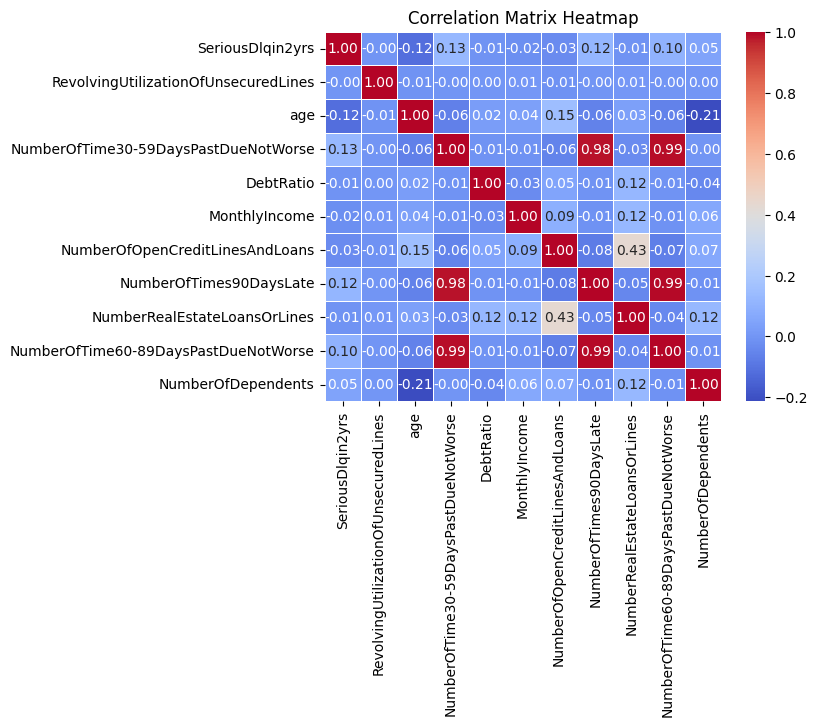

In [8]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Нетрудно заметить, насколько велика корелляция между колонками NumberOfTime30-59DaysPastDueNotWorse, NumberOfTimes90DaysLate, NumberOfTime60-89DaysPastDueNotWorse.
В каких-то моделях это не повлияет никак (например, в дереве и основанных на нем моделях), а где-то сильно ухудшит результат (Логрег, kNN, SMV). Отсюда вывод - дропаем две из них. Оставим, например, NumberOfTimes90DaysLate.

In [9]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [10]:
df.drop(columns=['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse'], inplace=True)

In [11]:
test_data.drop(columns=['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse'], inplace=True)

In [12]:
test_data

,Unnamed: 0,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfDependents
0,1,0.885519,43,0.177513,5700.0,4,0,0,0.0
1,2,0.463295,57,0.527237,9141.0,15,0,4,2.0
2,3,0.043275,59,0.687648,5083.0,12,0,1,2.0
3,4,0.280308,38,0.925961,3200.0,7,0,2,0.0
4,5,1.000000,27,0.019917,3865.0,4,0,0,1.0
...,...,...,...,...,...,...,...,...,...
101498,101499,0.282653,24,0.068522,1400.0,5,0,0,0.0
101499,101500,0.922156,36,0.934217,7615.0,8,0,2,4.0
101500,101501,0.081596,70,836.000000,5400.0,3,0,0,0.0
101501,101502,0.335457,56,3568.000000,5400.0,8,0,2,3.0


In [13]:
test_data.drop(columns=['Unnamed: 0'], inplace=True)

In [14]:
print(df.shape)
df.dropna()
print(df.shape)

(150000, 9)
(150000, 9)


Пропусков у нас может и нет, а это может значить, что их кто-то заполнил за нас. Особенно четко на это указывают нулевые возраст, доход и т.д.
Посмотрим на боксплоты и подумаем, что у нас может быть не так. 

In [15]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfDependents'],
      dtype='object')

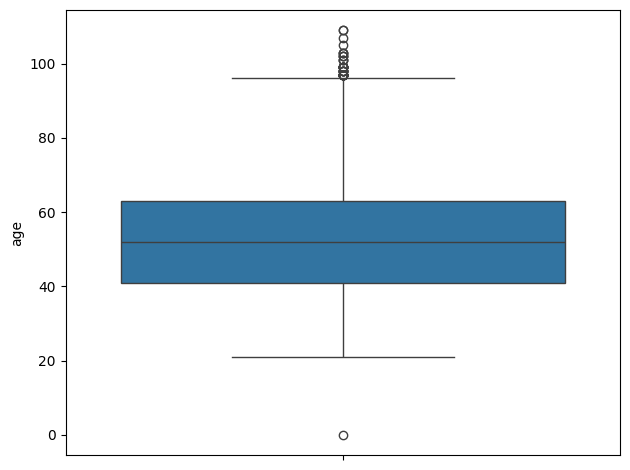

In [16]:
sns.boxplot(y=df['age'])
plt.tight_layout()
plt.show()

Ага, значит все что больше 95 и меньше 20 - выбросы. Посмотрим на остальные колонки

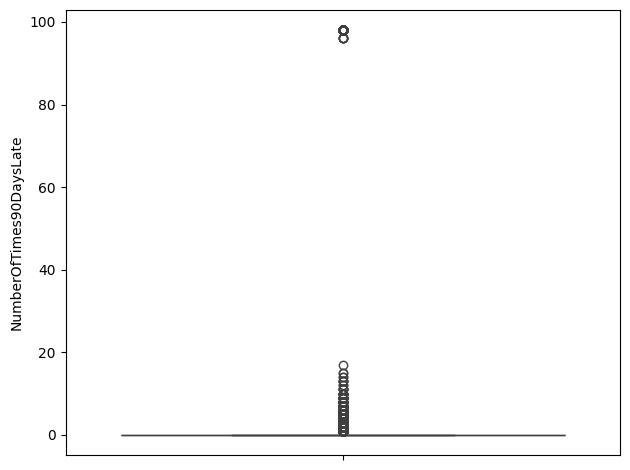

In [17]:
sns.boxplot(y=df['NumberOfTimes90DaysLate'])
plt.tight_layout()
plt.show()

Скорее всего, все что выше 90 - явные выбросы

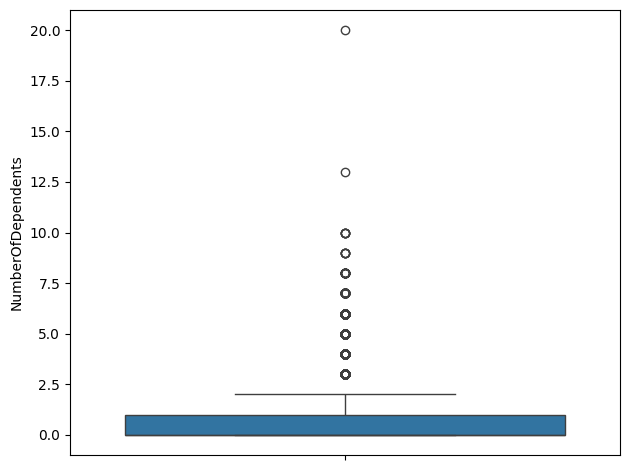

In [18]:
sns.boxplot(y=df['NumberOfDependents'])
plt.tight_layout()
plt.show()

Исходя из описания колонки: Number of dependents in family excluding themselves (spouse, children etc.), поверить можно еще в 7-8 (2-3 ребенка, супруга, родители супруга и родители свои), но явно не больше. Так что считаем 9 и более выбросами.

В итоге имеем:

In [19]:
df = df.loc[(df.age <= 96) & (df.age >= 20) & (df.NumberOfTimes90DaysLate <= 80) & (df.NumberOfDependents <= 8)]

In [20]:
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfDependents
0,1,0.766127,45,0.802982,9120.0,13,0,6,2.0
1,0,0.957151,40,0.121876,2600.0,4,0,0,1.0
2,0,0.658180,38,0.085113,3042.0,2,1,0,0.0
3,0,0.233810,30,0.036050,3300.0,5,0,0,0.0
4,0,0.907239,49,0.024926,63588.0,7,0,1,0.0
...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0.225131,2100.0,4,0,1,0.0
149996,0,0.299745,44,0.716562,5584.0,4,0,1,2.0
149997,0,0.246044,58,3870.000000,NaN,18,0,1,0.0
149998,0,0.000000,30,0.000000,5716.0,4,0,0,0.0


Как оказалось позже, пропуски мы всё же потеряли...Так что заполним медианами

In [21]:
df = df.fillna(df.median())
test_data = test_data.fillna(df.median())

In [22]:
test_data.shape

(101503, 8)

Ну, как могли подготовили данные. Теперь пора бы и поработать. Разделим для начала на трейн и тест.

In [23]:
y = df['SeriousDlqin2yrs']
X = df.drop(columns=['SeriousDlqin2yrs'])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

Куда без нормировки!

In [25]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
test_data_scaled = scaler.transform(test_data)

In [26]:
test_data_scaled.shape

(101503, 8)

In [27]:
from typing import Any

test_index = test_data.index

def export(id_str: str, model: Any, X_test: np.ndarray) -> None:
    """Exports model predictions to CSV format"""
    (pd.Series(
        model.predict_proba(X_test)[:, 1], 
        index=test_index+1, 
        name="Probability"
    ).to_csv(f"./data/{id_str}.csv", index=True, header=True, index_label='Id'))

**Naive Bayes**

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

print(np.mean(cross_val_score(nb, X_train_scaled, y_train, cv=5, scoring='roc_auc')))

0.7323255500778204


In [29]:
nb.fit(X_train_scaled, y_train)
export('nb', nb, test_data_scaled)

Результат в кегле: 0.73674

**kNN**

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

print(np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='roc_auc')))

0.6555530525707912


kNN кринж

In [ ]:
knn.fit(X_train_scaled, y_train)
export('knn', knn, test_data_scaled)

В кегле 0.67171. Ну такое себе

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
}
gs = GridSearchCV(lr, params, cv=5, scoring='roc_auc')
gs.fit(X_train_scaled, y_train)
gs.best_params_

lr = LogisticRegression().set_params(**gs.best_params_)

print(np.mean(cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='roc_auc')))

0.7411933549584022


Имба!

In [ ]:
lr.fit(X_train_scaled, y_train)
export('lr', lr, test_data_scaled)

0.74509 в кегле!

**SVC**

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf')

print(np.mean(cross_val_score(svc, X_train_scaled, y_train, cv=5, scoring='roc_auc')))

0.6246428994712524


Я этот позор даже в кеглю грузить не буду

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

params = {
    'max_depth': [5, 10, 15, 20, 25],
}
gs = GridSearchCV(dt, params, cv=5, scoring='roc_auc')
gs.fit(X_train_scaled, y_train)
gs.best_params_

dt = DecisionTreeClassifier().set_params(**gs.best_params_)

print(np.mean(cross_val_score(dt, X_train_scaled, y_train, cv=5, scoring='roc_auc')))

0.8160218304665824


In [ ]:
dt.fit(X_train_scaled, y_train)
export('dt', dt, test_data_scaled)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

params = {
    'max_depth': [5, 10, 15, 20, 25, 35],
    'n_estimators': [5, 20, 40, 70, 100, 125]
}

gs = GridSearchCV(rfc, params, cv=5, scoring='roc_auc')
gs.fit(X_train, y_train)
gs.best_params_

rfc = RandomForestClassifier().set_params(**gs.best_params_)

print(np.mean(cross_val_score(rfc, X_train, y_train, cv=5, scoring='roc_auc')))

0.8325334271678422


In [ ]:
rfc.fit(X_train, y_train)
export('rfc', rfc, test_data)

**Sklearn Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

params = {
    'max_depth': [2, 3, 4, 5, 6],
    'n_estimators': [5, 20, 40, 70, 100, 125]
}

gs = GridSearchCV(gb, params, cv=5, scoring='roc_auc')
gs.fit(X_train, y_train)
gs.best_params_

gb = RandomForestClassifier().set_params(**gs.best_params_)

print(np.mean(cross_val_score(gb, X_train, y_train, cv=5, scoring='roc_auc')))

0.8228668251032442


In [ ]:
gb.fit(X_train, y_train)
export('gb', gb, test_data)

0.82575

**My own Gradient Boosting**

In [31]:
from gradboost import MyGradientBoosting

mygb = MyGradientBoosting()
mygb.fit(X_train, y_train)

export('mygb', mygb, test_data)

0.81235

**XGBoost**

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

export('xgb', xgb, test_data)

0.82890

**Catboost**

In [ ]:
import catboost as cb


cb = cb.CatBoostClassifier()
cb.fit(X_train, y_train)

export("cb", cb, test_data)

Learning rate set to 0.08067
0:	learn: 0.5841790	total: 59.2ms	remaining: 59.2s
1:	learn: 0.5007032	total: 70.9ms	remaining: 35.4s
2:	learn: 0.4355646	total: 82.3ms	remaining: 27.4s
3:	learn: 0.3894716	total: 93.4ms	remaining: 23.3s
4:	learn: 0.3533282	total: 102ms	remaining: 20.3s
5:	learn: 0.3202841	total: 111ms	remaining: 18.3s
6:	learn: 0.2946044	total: 119ms	remaining: 16.9s
7:	learn: 0.2744563	total: 131ms	remaining: 16.3s
8:	learn: 0.2612821	total: 144ms	remaining: 15.8s
9:	learn: 0.2513772	total: 155ms	remaining: 15.3s
10:	learn: 0.2402020	total: 166ms	remaining: 14.9s
11:	learn: 0.2312225	total: 178ms	remaining: 14.7s
12:	learn: 0.2247527	total: 189ms	remaining: 14.3s
13:	learn: 0.2190785	total: 198ms	remaining: 13.9s
14:	learn: 0.2147987	total: 208ms	remaining: 13.6s
15:	learn: 0.2117299	total: 221ms	remaining: 13.6s
16:	learn: 0.2092205	total: 234ms	remaining: 13.5s
17:	learn: 0.2061778	total: 246ms	remaining: 13.4s
18:	learn: 0.2038257	total: 257ms	remaining: 13.3s
19:	lear

0.83505

**LightGBM**

In [ ]:
import lightgbm as lgb


lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train, y_train)

export("lgbm", lgbm, test_data)

[LightGBM] [Info] Number of positive: 8281, number of negative: 115643
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002006 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 940
[LightGBM] [Info] Number of data points in the train set: 123924, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.066823 -> initscore=-2.636544
[LightGBM] [Info] Start training from score -2.636544


0.83602

In [ ]:
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfDependents
0,1,0.766127,45,0.802982,9120.0,13,0,6,2.0
1,0,0.957151,40,0.121876,2600.0,4,0,0,1.0
2,0,0.658180,38,0.085113,3042.0,2,1,0,0.0
3,0,0.233810,30,0.036050,3300.0,5,0,0,0.0
4,0,0.907239,49,0.024926,63588.0,7,0,1,0.0
...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0.225131,2100.0,4,0,1,0.0
149996,0,0.299745,44,0.716562,5584.0,4,0,1,2.0
149997,0,0.246044,58,3870.000000,5400.0,18,0,1,0.0
149998,0,0.000000,30,0.000000,5716.0,4,0,0,0.0


In [ ]:
from pycaret.classification import *

# Простейшая настройка без дополнительных опций
setup(data=df, 
      target='SeriousDlqin2yrs',
      session_id=42,
      verbose=False)  # Минимальный вывод

top_model = compare_models(sort='AUC', n_select=1)
print(f"Лучшая модель: {type(top_model).__name__}")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9360,0.8354,0.1383,0.5809,0.2233,0.2029,0.2617,2.2260
lightgbm,Light Gradient Boosting Machine,0.9360,0.8342,0.1354,0.5829,0.2196,0.1996,0.2595,0.2320
ada,Ada Boost Classifier,0.9349,0.8310,0.1737,0.5334,0.2619,0.2370,0.2787,0.5170
rf,Random Forest Classifier,0.9348,0.8071,0.1418,0.5402,0.2246,0.2025,0.2533,2.1470
et,Extra Trees Classifier,0.9326,0.7845,0.1443,0.4810,0.2218,0.1972,0.2372,1.3750
lr,Logistic Regression,0.9351,0.7423,0.0859,0.5890,0.1498,0.1351,0.2073,1.5210
ridge,Ridge Classifier,0.9350,0.7412,0.0722,0.5980,0.1287,0.1161,0.1916,0.0310
lda,Linear Discriminant Analysis,0.9350,0.7412,0.1549,0.5428,0.2409,0.2178,0.2657,0.0320
qda,Quadratic Discriminant Analysis,0.9182,0.7340,0.3466,0.3766,0.3609,0.3173,0.3176,0.0360
nb,Naive Bayes,0.9255,0.7328,0.2554,0.4073,0.3128,0.2757,0.2846,0.0280


Лучшая модель: GradientBoostingClassifier


In [ ]:
tuned_model = tune_model(top_model, 
                        optimize='AUC',
                        n_iter=20, 
                        choose_better=True)

print("Метрики после тюнинга:")
predict_model(tuned_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9370,0.8434,0.1471,0.6135,0.2372,0.2171,0.2794
1,0.9376,0.8506,0.1603,0.6229,0.2550,0.2341,0.2946
2,0.9338,0.8182,0.1221,0.5123,0.1971,0.1760,0.2270
3,0.9361,0.8395,0.1441,0.5833,0.2311,0.2103,0.2681
4,0.9355,0.8311,0.1529,0.5591,0.2402,0.2178,0.2691
5,0.9368,0.8399,0.1429,0.6062,0.2312,0.2112,0.2733
6,0.9355,0.8444,0.1399,0.5621,0.2241,0.2029,0.2581
7,0.9348,0.8303,0.1281,0.5438,0.2074,0.1868,0.2417
8,0.9362,0.8270,0.1441,0.5868,0.2314,0.2107,0.2690


Fitting 10 folds for each of 20 candidates, totalling 200 fits
Метрики после тюнинга:


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9363,0.8342,0.1432,0.5890,0.2303,0.2097,0.2687


,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfDependents,SeriousDlqin2yrs,prediction_label,prediction_score
34670,0.000000,48,0.208280,11666.0,8,0,1,3.0,0,0,0.9824
76453,0.010405,56,0.285057,7166.0,5,0,1,5.0,0,0,0.9878
67569,0.130987,84,760.000000,5400.0,3,0,1,0.0,0,0,0.9837
24006,0.095085,33,0.290338,6333.0,8,0,1,0.0,0,0,0.9840
88209,0.000000,62,0.000000,0.0,1,0,0,0.0,0,0,0.9871
...,...,...,...,...,...,...,...,...,...,...,...
64921,0.006271,63,1931.000000,0.0,13,0,1,0.0,0,0,0.9871
130379,0.936980,50,0.231544,4171.0,7,0,0,0.0,0,0,0.8791
52156,0.224315,59,0.256836,8666.0,6,0,1,2.0,0,0,0.9845
23471,0.263142,60,0.242824,8709.0,11,0,1,0.0,0,0,0.9792


In [ ]:
final_model = finalize_model(tuned_model)

In [ ]:
export('automl', final_model, test_data)

0.83875

(однако public score равен 0.83176, что ниже чем у lgbm - 0.83199)

**Вывод**

Я так себе мл инженер видимо, раз меня победил автомл, пусть и не очень сильно.
Победители - lgbm и automl с ROC AUC 0.83602 и 0.83875 соответственно.